<a href="https://colab.research.google.com/github/Obatsa/Movie-reccomender/blob/main/index2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from google.colab import files
uploaded = files.upload()

Saving tags.csv to tags.csv
Saving ratings.csv to ratings.csv
Saving movies.csv to movies.csv
Saving links.csv to links.csv


In [4]:
import io

In [231]:
tags = pd.read_csv(io.BytesIO(uploaded["tags.csv"]))
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [27]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [26]:
tags.shape

(3683, 4)

The tags dataframe has 3683 columns with 4 columns, most columns are of the numeric type except the tag column.

In [6]:
ratings = pd.read_csv(io.BytesIO(uploaded["ratings.csv"]))
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [28]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [29]:
ratings.shape

(100836, 4)

The ratings dataframe has 100836 entries with 4 columns. all columns in this data frame are numeric.

In [170]:
movies = pd.read_csv(io.BytesIO(uploaded["movies.csv"]))
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [30]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [31]:
movies.shape

(9742, 3)

The movies dataframe contains 9742 entries with 3 columns. There is only one numeric column and the rest are of type object.

In [8]:
links = pd.read_csv(io.BytesIO(uploaded["links.csv"]))
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [32]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [33]:
links.shape

(9742, 3)

The links dataframe contains 9742 entries with 3 columns. All columns are numeric type.

# Exploratory Data Analysis
In this phase of the data analysis step, we will be looking for patterns among the different features in the dataframes. We will do this by going through the above data frames one by one. Below we begin with the first one:

### 1. tags dataframe

In [232]:
# Checking the info and shape of the df again
print("Tags df shape ", tags.shape)
print("")
tags.info()

Tags df shape  (3683, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [233]:
# Statistical summary of the numeric features of the data frame
tags.describe()

,userId,movieId,timestamp
count,3683.000000,3683.000000,3.683000e+03
mean,431.149335,27252.013576,1.320032e+09
std,158.472553,43490.558803,1.721025e+08
min,2.000000,1.000000,1.137179e+09
25%,424.000000,1262.500000,1.137521e+09
50%,474.000000,4454.000000,1.269833e+09
75%,477.000000,39263.000000,1.498457e+09
max,610.000000,193565.000000,1.537099e+09


In [115]:
tags.isna().sum()

userId     0
movieId    0
tag        0
dtype: int64

Checking the number of unique values in each column. With the time stamp it is not necessary as it is an indicator of the time the movie was tagged in the data. We will look to drop this column later as it does not provide much for what we are trying to achieve. The dataframe has no missing values.

In [38]:
# Checking the number of unique values in each column
print("Number of users is ", tags.userId.nunique())
print("Number of movies tagged is ", tags.movieId.nunique())

Number of users is  58
Number of movies tagged is  1572


In [46]:
tags.movieId.unique()

array([ 60756,  89774, 106782, ...,   6107,   7936,   3265])

In [47]:
tags.userId.unique()

array([  2,   7,  18,  21,  49,  62,  63,  76, 103, 106, 112, 119, 125,
       132, 138, 161, 166, 167, 177, 184, 193, 205, 226, 256, 274, 288,
       289, 291, 300, 305, 318, 319, 327, 336, 341, 356, 357, 419, 424,
       435, 439, 462, 474, 477, 487, 506, 509, 513, 520, 533, 537, 543,
       567, 573, 599, 600, 606, 610])

In [43]:
# Checking top 20 movies based on movieId count
tags["movieId"].value_counts()[:20]

296       181
2959       54
924        41
293        35
7361       34
1732       32
4878       29
260        26
79132      26
135536     19
72998      18
4144       18
3676       17
1921       17
122912     15
4226       13
71899      13
68954      13
541        13
5673       13
Name: movieId, dtype: int64

In [45]:
# Checking top 10 active users
tags["userId"].value_counts()[:10]

474    1507
567     432
62      370
599     323
477     280
424     273
537     100
125      48
357      45
318      41
Name: userId, dtype: int64

User 474 is the most active in with about 1507 tags for movies provided. We feel there is not much we can obtain from this dataframe unless it is combined with another dataframe to provide more insight. therefore we will drop the "timestamp" column and prepare for further action later.

In [234]:
# Dropping the timestamp column
tags.drop("timestamp", axis= 1,inplace= True)

### 2. ratings dataframe

In [53]:
# Checking the info and shape again
print("ratings dataframe shape ", ratings.shape)
print("")
ratings.info()

ratings dataframe shape  (100836, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [54]:
# Checking a statistical summary of the dataframe
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [114]:
ratings.isna().sum()

userId     0
movieId    0
rating     0
dtype: int64

From above, we can summise that, there are 3 columns which can provide us with the most information, these are, "userId", "movieId" and "rating" columns. The dataframe also contains no missing values.
##### Questions
1. Do ratings depend on a particular user?
2. Which movies had the highest ratings?

In [55]:
# Checking the number of users and movies in the dataframe
print("Number of users ", ratings.userId.nunique())
print("Number of movies ", ratings.movieId.nunique())

Number of users  610
Number of movies  9724


In [56]:
# We know that the ratings are on a scale of 1-5
# We check the number of unique values in the rating column
ratings.rating.value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

In [90]:
# We define a function for distribution plot
def plot_count(df, column1):
  # plt.subplots(figsize= (15, 10))
  sns.displot(df, x= column1)
  plt.title(f"Plot of {column1} distribution.")

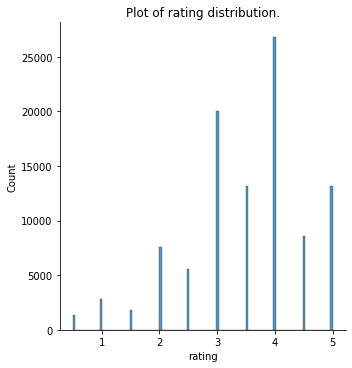

In [91]:
# ploting ratings distribution
plot_count(ratings, "rating")

From the above distribution, we can see that most movies have a rating of 4 and above, which is above the average rating of 3.5.

In [108]:
ratings[ratings["rating"] == 4.0].groupby("rating")["userId"].value_counts()[:10]

rating  userId
4.0     414       903
        474       569
        606       441
        603       393
        380       391
        448       337
        249       314
        318       299
        105       286
        610       286
Name: userId, dtype: int64

In [109]:
ratings[ratings["rating"] == 5.0].groupby("rating")["userId"].value_counts()[:10]
# probably check later on the logic

rating  userId
5.0     380       274
        414       248
        275       189
        305       182
        610       180
        603       170
        597       169
        105       135
        1         124
        122       124
Name: userId, dtype: int64

From above we can see that some users provide above average rating more so than others. Below we will drop the time stamp column as it does not provide much information on what we are aiming to accomplish.

In [111]:
ratings.drop("timestamp", axis= 1, inplace= True)

### 3. links dataframe

In [112]:
# Checking the shape and info again
print("The shape of links dataframe is ", links.shape)
print("")
links.info()

The shape of links dataframe is  (9742, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [113]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


The dataframe contains all numeric columns. From the cells above we observe that there appears to be no statistically significant columns which will be of use to our task. The columns in this dataframe seem to serve more as a link between the different dataframes above and including it in the final dataframe could be redundant.

### 4. movies dataframe

In [145]:
# Checking the shape and info
print("The movies dataframe shape is ", movies.shape)
print("")
movies.info()

The movies dataframe shape is  (9742, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [146]:
movies.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

The data frame has no missing values. The dataframe contains 3 columns with one being a numeric column with the others being of object type.

In [147]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [148]:
movies.tail()

,movieId,title,genres
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy


We have observed that the title column contains the string title of the movie with the year of the movie, we will extract this years from this movies and put them in a new column "years". First we split the genres column into a list containing their respective genre names.

We now extract the years from the title column below:

In [171]:
movies["year"] = movies["title"].str.extract(".*\((.*)\).*", expand= False)
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [150]:
# Check unique values
movies.year.unique()

array(['1995', '1994', '1996', '1976', '1992', '1967', '1993', '1964',
       '1977', '1965', '1982', '1990', '1991', '1989', '1937', '1940',
       '1969', '1981', '1973', '1970', '1955', '1959', '1968', '1988',
       '1997', '1972', '1943', '1952', '1951', '1957', '1961', '1958',
       '1954', '1934', '1944', '1960', '1963', '1942', '1941', '1953',
       '1939', '1950', '1946', '1945', '1938', '1947', '1935', '1936',
       '1956', '1949', '1932', '1975', '1974', '1971', '1979', '1987',
       '1986', '1980', '1978', '1985', '1966', '1962', '1983', '1984',
       '1948', '1933', '1931', '1922', '1998', '1929', '1930', '1927',
       '1928', '1999', '2000', '1926', '1919', '1921', '1925', '1923',
       '2001', '2002', '2003', '1920', '1915', '1924', '2004', '1916',
       '1917', '2005', '2006', '1902', nan, '1903', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '1908', '2006–2007'], dtype=object)

The column year contains missing values and also has an invalid year of "2006-2007". We replace this with the appropriate value below

In [172]:
movies[movies["year"] == "2006–2007"]

,movieId,title,genres,year
9518,171749,Death Note: Desu nôto (2006–2007),(no genres listed),2006–2007


In [173]:
# from google search we have the year as 2006
movies["year"] = movies["year"].replace("2006–2007", "2006")

# replace "no genres listed" with np.nan
movies["genres"] = movies["genres"].replace("(no genres listed)", np.nan)

In [174]:
movies[movies["year"].isna()]

,movieId,title,genres,year
6059,40697,Babylon 5,Sci-Fi,NaN
9031,140956,Ready Player One,Action|Sci-Fi|Thriller,NaN
9091,143410,Hyena Road,NaN,NaN
9138,147250,The Adventures of Sherlock Holmes and Doctor W...,NaN,NaN
9179,149334,Nocturnal Animals,Drama|Thriller,NaN
9259,156605,Paterson,NaN,NaN
9367,162414,Moonlight,Drama,NaN
9448,167570,The OA,NaN,NaN
9514,171495,Cosmos,NaN,NaN
9515,171631,Maria Bamford: Old Baby,NaN,NaN


In [175]:
(movies.isna().sum() / len(movies)) * 100

movieId    0.000000
title      0.000000
genres     0.349004
year       0.123178
dtype: float64

Since we have a small percentage of the row with missing values, we will drop these rows subseting it based on the year.

In [192]:
movies.dropna(subset= ["genres"], inplace= True)

In [193]:
movies.isna().sum()

movieId    0
title      0
genres     0
year       0
dtype: int64

In [194]:
# convert the year column to numeric type
movies["year"] = movies["year"].astype(int)

Next we remove the years from the titles below

In [178]:
movies["title"] = movies["title"].str.replace(r"\(.*\)","")
movies.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


We make a copy to perform a different a visualization on the genres column.

In [195]:
movies_copy = movies.copy()
movies_copy = movies_copy.assign(genres = movies_copy["genres"].str.split("|")).explode("genres")
movies_copy.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure,1995
0,1,Toy Story,Animation,1995
0,1,Toy Story,Children,1995
0,1,Toy Story,Comedy,1995
0,1,Toy Story,Fantasy,1995


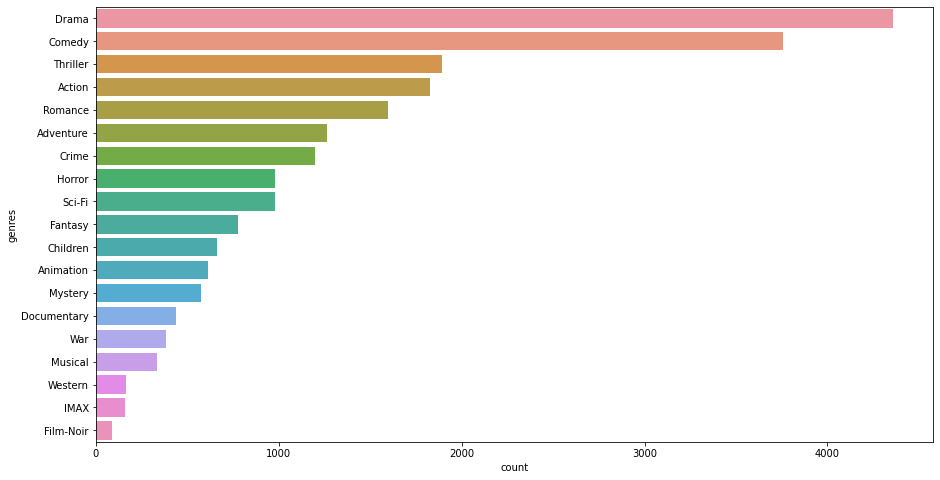

In [196]:
# plotting the count plot
fig, ax = plt.subplots(figsize= (15, 8))
ax = sns.countplot(y= "genres", data= movies_copy, order= movies_copy["genres"].value_counts().index)

Drama and Comedy are the most popular movie genres of all time. Film-Noir is the least movie genre of all time.

In [ ]:
# Check genre by years

Below we check for duplicates

In [210]:
movies_copy[movies_copy.duplicated(["title", "genres", "year"], keep= False)]

,movieId,title,genres,year


In [209]:
movies_copy.drop_duplicates(["title", "genres", "year"], keep= "first", inplace= True)

### Making a master dataframe
We will merge different data frames to make a harmonised dataframe containing appropriate data. First lets have a look at the dataframes and how they can be merged together based on the criterions available.

In [235]:
tags.head()

,userId,movieId,tag
0,2,60756,funny
1,2,60756,Highly quotable
2,2,60756,will ferrell
3,2,89774,Boxing story
4,2,89774,MMA


From the above dataframe, we can see that some movies with similar ids have the same tag. We will therefore join this tags together into a single entry below.

In [248]:
tags = (tags.groupby(["userId", "movieId"]).agg({"tag": lambda x: x.to_list()}, axis= 1).reset_index())
tags.head()

,userId,movieId,tag
0,2,60756,"[funny, Highly quotable, will ferrell]"
1,2,89774,"[Boxing story, MMA, Tom Hardy]"
2,2,106782,"[drugs, Leonardo DiCaprio, Martin Scorsese]"
3,7,48516,[way too long]
4,18,431,"[Al Pacino, gangster, mafia]"


We had previously conluded that the links dataframe would not be very useful in the task at hand therefore we will not include it in our final dataframe.

In [213]:
movies_copy.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure,1995
0,1,Toy Story,Animation,1995
0,1,Toy Story,Children,1995
0,1,Toy Story,Comedy,1995
0,1,Toy Story,Fantasy,1995


In [214]:
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [249]:
# merging 
df1 = pd.merge(movies_copy, ratings, on= "movieId")
df1.head()

,movieId,title,genres,year,userId,rating
0,1,Toy Story,Adventure,1995,1,4.0
1,1,Toy Story,Adventure,1995,5,4.0
2,1,Toy Story,Adventure,1995,7,4.5
3,1,Toy Story,Adventure,1995,15,2.5
4,1,Toy Story,Adventure,1995,17,4.5


In [250]:
df_final = pd.merge(df1, tags, on= ["userId", "movieId"])
df_final.head()

,movieId,title,genres,year,userId,rating,tag
0,1,Toy Story,Adventure,1995,336,4.0,[pixar]
1,1,Toy Story,Animation,1995,336,4.0,[pixar]
2,1,Toy Story,Children,1995,336,4.0,[pixar]
3,1,Toy Story,Comedy,1995,336,4.0,[pixar]
4,1,Toy Story,Fantasy,1995,336,4.0,[pixar]


In [251]:
df_final.shape

(3985, 7)

In [252]:
df_final.isna().sum()

movieId    0
title      0
genres     0
year       0
userId     0
rating     0
tag        0
dtype: int64

In [ ]:
# On to the next one

In [243]:
# tags_copy = tags.copy()
# tags_copy.head()

,userId,movieId,tag
0,2,60756,funny
1,2,60756,Highly quotable
2,2,60756,will ferrell
3,2,89774,Boxing story
4,2,89774,MMA


In [244]:
# tags_copy = (tags_copy.groupby(["movieId", "userId"]).agg({"tag": lambda x: ",".join(x)}, axis= 1).reset_index())
# tags_copy.head()

,movieId,userId,tag
0,1,336,pixar
1,1,474,pixar
2,1,567,fun
3,2,62,"fantasy,magic board game,Robin Williams"
4,2,474,game


In [245]:
tags_copy.shape

(1775, 3)

In [247]:
tags.shape

(3683, 3)

In [242]:
# tags_copy = (tags_copy.groupby(["movieId", "userId"]).agg({"tag": lambda x: x.to_list()}, axis= 1).reset_index())
# tags_copy.head()

,movieId,userId,tag
0,1,336,[pixar]
1,1,474,[pixar]
2,1,567,[fun]
3,2,62,"[fantasy, magic board game, Robin Williams]"
4,2,474,[game]
